In [1]:
from pyscf import gto, scf, rt, ehrenfest, tdscf, prop
from pyscf.ehrenfest import rhf, chkfile
from pyscf import lib, lo
import numpy as np
import time

In [2]:
mol =   gto.Mole( atom='''
Na    0.0000000    0.0000000    1.23000
Cl    0.0000000    0.0000000   -1.23000'''
, basis='3-21g', symmetry=False).build()

mf = scf.RHF(mol)
mf.verbose = 0
# mf.max_cycle = 0
mf.kernel()

-618.2429890427495

In [3]:
# MD section 1
t0 = time.time()

dm = mf.make_rdm1()
fock = mf.get_fock()
ehmd = ehrenfest.rhf.MDHF(mf)
ehmd.verbose = 0
ehmd.maxstep_N = 5
ehmd.maxstep_Ne = 5
ehmd.maxstep_e = 10
# ehmd.md_method = 'bomd'
ehmd.prop_method = "mmut"
ehmd.dt_N      = 1
ehmd.dt_Ne     = 0.2
ehmd.dt_e      = 0.02
ehmd.kernel(dm_ao_init=dm)

t1 = time.time()

138: updated energy(update_force): -6.182151720786e+02
139: updated force:
 [[ 8.28545982e-16 -6.95071273e-16  8.69998346e-03]
 [-8.28545982e-16  6.95071273e-16 -8.69998346e-03]]
Initial energy: -6.182429890427e+02
geo_init: [[ 0.    0.    1.23]
 [ 0.    0.   -1.23]]
mdhf.mol.atom_coords: [[ 0.    0.    1.23]
 [ 0.    0.   -1.23]]
initial force:
 [[-8.28545982e-16  6.95071273e-16 -8.69998346e-03]
 [ 8.28545982e-16 -6.95071273e-16  8.69998346e-03]]
initial momenta:
 [[0. 0. 0.]
 [0. 0. 0.]]
138: updated energy(update_force): -6.142332208801e+02
139: updated force:
 [[ 0.08451251  0.07794797  8.48459016]
 [ 0.70409828  2.61524206 -4.2682188 ]]
Updated momenta of Ehrenfest MD cycle 1:
 [[-0.04225626 -0.03897398 -4.24664507]
 [-0.35204914 -1.30762103  2.13845939]]
Updated coords of Ehrenfest MD cycle 1:
 [[-5.23109662e-21  4.38839252e-21  1.22999995e+00]
 [ 3.39243172e-21 -2.84592755e-21 -1.22999996e+00]]
138: updated energy(update_force): -6.142356098842e+02
139: updated force:
 [[ 0.0843

In [3]:
# MD Section 2
dm = ehmd.ndm_ao[-1]
ehmd2 = ehrenfest.rhf.MDHF(mf)
ehmd2.momenta_init = ehmd.nmomenta[-1]
ehmd2.force_init = ehmd.nforce[-1]
ehmd2.geo_init = ehmd.ngeo[-1]
ehmd2.maxstep_N = 1000
ehmd2.maxstep_Ne = 10
ehmd2.maxstep_e = 5
# ehmd.md_method = 'bomd'
ehmd2.prop_method = "mmut"
ehmd2.dt_N      = 1
ehmd2.dt_Ne     = 0.1
ehmd2.dt_e      = 0.02
ehmd2.kernel(dm_ao_init=dm)

Initial energy: -1.572878213961e+03
geo_init: [[ 1.62568649e-04 -6.75378722e-04  7.30563415e+04]
 [-1.05618244e-04  4.37906972e-04 -4.73787552e+04]]
mdhf.mol.atom_coords: [[ 1.62568649e-04 -6.75378722e-04  7.30563415e+04]
 [-1.05618244e-04  4.37906972e-04 -4.73787552e+04]]
initial force:
 [[ 4.50537493e-12 -6.02118521e-12  3.31054514e-08]
 [-6.06993094e-10  9.25651528e-11 -9.92579694e-06]]
initial momenta:
 [[ 6.56678632e-05 -2.72899153e-04  2.95186279e+04]
 [-6.58315169e-05  2.72863274e-04 -2.95193148e+04]]
138: updated energy(update_force): -5.753013233218e+02
139: updated force:
 [[ 1.62383269e-13  1.03098539e-13 -2.83899247e-07]
 [ 2.44598725e-11 -3.67352960e-11  6.12250979e-06]]
Updated momenta of Ehrenfest MD cycle 1:
 [[ 6.56678654e-05 -2.72899156e-04  2.95186279e+04]
 [-6.58318326e-05  2.72863339e-04 -2.95193148e+04]]
Updated coords of Ehrenfest MD cycle 1:
 [[ 1.62569478e-04 -6.75382167e-04  7.30567143e+04]
 [-1.05618783e-04  4.37909206e-04 -4.73789969e+04]]
138: updated energ

In [78]:
geo1 = ehmd.ngeo[0] * lib.param.BOHR
geo2 = ehmd.ngeo[1] * lib.param.BOHR

mol1 = gto.Mole( atom='''
Na    %10.7f  %10.7f  %10.7f
Cl    %10.7f  %10.7f  %10.7f'''%(geo1[0][0], geo1[0][1], geo1[0][2], geo1[1][0], geo1[1][1], geo1[1][2])
, basis='3-21g', symmetry=False).build()

mf1 = scf.RHF(mol1)
mf1.verbose = 0
mf1.max_cycle = 0
mf1.kernel()
grad1 = mf1.Gradients().grad()
print("Gradients at geo1:\n",grad1)
print("geo1:",geo1, "\n")

mol2 = gto.Mole( atom='''
Na    %10.7f  %10.7f  %10.7f
Cl    %10.7f  %10.7f  %10.7f'''%(geo2[0][0], geo2[0][1], geo2[0][2], geo2[1][0], geo2[1][1], geo2[1][2])
, basis='3-21g', symmetry=False).build()

mf2 = scf.RHF(mol2)
mf2.verbose = 0
mf2.max_cycle = 0
mf2.kernel()
grad2 = mf2.Gradients().grad()
print("Gradients at geo2:\n",grad2)
print("geo2:",geo2, "\n")

dz1 = geo2[0][2] - geo1[0][2]
dz2 = geo2[1][2] - geo1[1][2]

print('dz1:',dz1 )
print('dz2:',dz2 )
print('Energy of geo1: %18.12e'%mf1.e_tot)
print('Energy of geo2: %18.12e'%mf2.e_tot)
print('Energy difference: %18.12e'%(mf2.e_tot-mf1.e_tot))
print('Energy differential1: %20.16e'%(grad1[0][2] * dz1 / lib.param.BOHR + grad1[1][2] * dz2 / lib.param.BOHR))
print('Energy differential2: %20.16e'%(grad2[0][2] * dz1 / lib.param.BOHR + grad2[1][2] * dz2 / lib.param.BOHR))
print('test: %18.12f'%(grad1[0][2] * dz1 + grad1[1][2] * dz2 + grad2[0][2] * dz1 + grad2[1][2] * dz2))

Gradients at geo1:
 [[-4.08764178e-17  3.03320218e-17  3.51599975e-03]
 [ 4.08764178e-17 -3.03320218e-17 -3.51599974e-03]]
geo1: [[ 0.    0.    1.23]
 [ 0.    0.   -1.23]] 

Gradients at geo2:
 [[ 1.63329346e-17  5.56303040e-17  3.51599975e-03]
 [-1.63329346e-17 -5.56303040e-17 -3.51599974e-03]]
geo2: [[-9.60793098e-23 -1.76284743e-22  1.22999997e+00]
 [ 6.23086365e-23  1.14322865e-22 -1.22999998e+00]] 

dz1: -2.7338862507164663e-08
dz2: 1.772959490331516e-08
Energy of geo1: -6.182151720786e+02
Energy of geo2: -6.182151720786e+02
Energy difference: -4.547473508865e-13
Energy differential1: -2.9944729567737022e-10
Energy differential2: -2.9944729567803983e-10
test:    -0.000000000317


(-0.1, 0.1)

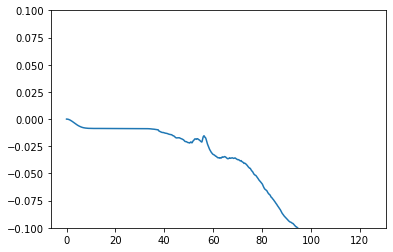

In [4]:
import matplotlib.pyplot as plt

time_tot = ehmd.ntime_N
geo  = ehmd.ngeo * lib.param.BOHR

# time_tot = np.arange(ehmd.maxstep_N + ehmd2.maxstep_N) * ehmd.dt_N
# geo  = np.concatenate((ehmd.ngeo, ehmd2.ngeo)) * lib.param.BOHR

bond_length = np.zeros(len(time_tot))
sq_sum = 0
for i in range(0, len(time_tot)):
    for j in range(0,3):
        sq_sum += np.power(geo[i][1][j]-geo[i][0][j],2)     
    bond_length[i] = np.sqrt(sq_sum)
    sq_sum = 0

with open('./ehmd_2500x2.txt', 'w') as f:
    f.write("#Time(fs)       #Bond_length\n")
    for i in range(0, len(time_tot)):
        f.write('%12.8f  %16.12f\n'%(time_tot[i] * 0.0249, bond_length[i]-bond_length[0]))
    
# print(bond_length)
plt.plot(time_tot * 0.0249, bond_length-bond_length[0])
plt.ylim(-0.1, 0.1)
# plt.xlim(0,1500)
# print('Time(h): %6.4f'%((t1 - t0)/3600))

(-0.05, 0.05)

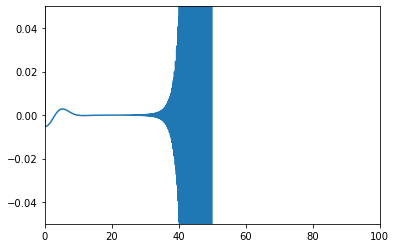

In [6]:
momenta = []
force = []
for i in range(0,len(time_tot)):
    momenta.append(ehmd.nmomenta[i][0][2])
    force.append(ehmd.nforce[i][0][2])
    
# print(momenta)
# plt.plot(time_tot * 0.0249, momenta)
plt.plot(time_tot * 0.0249, force)
plt.xlim(0,100)
# plt.ylim(-2,2)
plt.ylim(-0.05,0.05)

In [11]:
from functools import reduce

def orthogonalize(mf, method=None):
    import scipy
    s1e = mf.get_ovlp()
    s1e_inv = np.linalg.inv(s1e)

    if method == 'lowdin':
#         w1, v1 = np.linalg.eigh(s1e_inv)
        v = scipy.linalg.sqrtm(s1e_inv)
        v_inv = np.linalg.inv(v)
    return v,v_inv

def get_orthogonal_basis(method='lowdin', ovlp=None):                                                                       
    Z, L, ovlp_inv = None, None, None
    # lowdin orthogonalization
    if method == 'lowdin':
        e, v = np.linalg.eigh(ovlp)
        idx = e > 1e-15
        Z = np.dot(v[:,idx]/np.sqrt(e[idx]), v[:,idx].conj().T)
        L = np.dot(v[:,idx]*np.sqrt(e[idx]), v[:,idx].conj().T)
        ovlp_inv = np.dot(v[:,idx]/e[idx], v[:,idx].conj().T)
    elif method == 'cholesky':
        L = np.linalg.cholesky(ovlp)
        Z = scipy.linalg.solve_triangular(L.conj().T, np.eye(ovlp.shape[0]))
        ovlp_inv = np.linalg.inv(ovlp)

    return Z, L, ovlp_inv


def get_grad(mf, dm_ao=None):
    import scipy
    mol = mf.mol
    grad = mf.Gradients()
    
    s1e = mf.get_ovlp()
    h1e = mf.get_hcore()
    veff = mf.get_veff()
    dm0 = dm_ao
    
    s1 = grad.get_ovlp(mol)
    hcore_deriv = grad().hcore_generator(mol) 

    vhf = grad.get_veff(mol, dm=dm_ao)
#     print('vhf.shape:', vhf.shape)
    # vhf = np.asarray(s1)

#     fock_ao_real = mf.get_fock(dm=dm_ao.real, h1e=h1e_ao, vhf=veff_ao.real)
#     fock_ao_imag = mf.get_fock(dm=dm_ao.imag, h1e=h1e_ao, vhf=veff_ao.imag)
#     fock_ao = fock_ao_real +1j * fock_ao_imag
    fock_ao = mf.get_fock(dm=dm_ao, h1e=h1e, vhf=veff)
    
    mo_energy = mf.mo_energy
    mo_occ = mf.mo_occ
    mo_coeff = mf.mo_coeff
    dme0 = make_rdm1e(mo_energy, mo_coeff, mo_occ)

#     dv = get_trans_deriv(mf, s1, method=2)
#     print(dv) 
    V, V_inv = orthogonalize(mf, method='lowdin')
    
    VVTFP = np.einsum('ij,kj->ik', V, V)
    VVTFP = np.einsum('ij,jk,kl->il', VVTFP, fock_ao, dm0)
    VVTFP += VVTFP.T

#     print(dv_dm0)

    atmlst = range(mol.natm)
    aoslices = mol.aoslice_by_atom()
    
    pfp = np.einsum('ij,jk,kl->il', dm0, fock_ao, dm0)

    de = np.zeros((len(atmlst),3), dtype=np.complex128)

    for k, ia in enumerate(atmlst):
        p0, p1 = aoslices [ia,2:]
        h1ao = hcore_deriv(ia)    
        de[k] += np.einsum('xij,ij->x', h1ao, dm0)
        de[k] += np.einsum('xij,ij->x', vhf[:,p0:p1], dm0[p0:p1]) * 2  
#         de[k] -= np.einsum('xij,ij->x', s1[:,p0:p1], dme0[p0:p1]) * 2
#         de[k] -= np.einsum('ij,jk,xkl,il->x', fock_ao[p0:p1], v_inv[p0:p1], dv[:,p0:p1], dm0[p0:p1]) *2
#         de[k] -= np.einsum('ij,xjk,kl,il->x', dm0[p0:p1], dv[:,p0:p1], v_inv[p0:p1], fock_ao[p0:p1]) *2
#         de[k] -= np.einsum('ij,xij->x', pfp[p0:p1], s1[:,p0:p1]) 
        de[k] -= np.einsum('ij,xij->x', VVTFP[p0:p1], s1[:,p0:p1]) 


#         de[k] += grad().extra_force(ia, locals())  
        # print('f',fock_ao[p0:p1].shape)  
    # fock_dm = reduce(np.dot,(dm0,fock_ao,dm0))/2
    # print('trace[fock_dm*s1]',numpy.einsum('xij,ij->x',s1,fock_dm.real))
    # rt.util.print_matrix('dm0_fock_dm0', fock_dm)
    # print('de1:\n',de.real)
    # print('ds1:\n1', s1)
    
    return de.real + grad.grad_nuc(atmlst=atmlst)

def make_rdm1e(mo_energy, mo_coeff, mo_occ):
    '''Energy weighted density matrix'''
    mo0 = mo_coeff[:,mo_occ>0]
    mo0e = mo0 * (mo_energy[mo_occ>0] * mo_occ[mo_occ>0])
    return np.dot(mo0e, mo0.T.conj())
                              
mol =   gto.Mole( atom='''
Na    0.0000000    0.0000000    1.23000
Cl    0.0000000    0.0000000   -1.23000'''
, basis='3-21g', symmetry=False).build()

mf = scf.RHF(mol)
mf.verbose = 0
# mf.max_cycle = 0
mf.kernel()
g = mf.Gradients()
s1 = g.get_ovlp(mol)
# print(get_trans_deriv(mf,s1)[2])
dm = mf.make_rdm1()
print('de:',get_grad(mf,dm_ao=dm))
print('de1:',g.grad())

de: [[-1.30485757e-16  5.11626694e-16  4.33017716e-03]
 [ 1.30485757e-16 -5.11626694e-16 -4.33017716e-03]]
de1: [[ 6.98073194e-17 -1.80163404e-17  4.33016581e-03]
 [-6.98073194e-17  1.80163404e-17 -4.33016580e-03]]


In [10]:
from pyscf.rt.util import print_matrix
from functools import reduce

def get_trans_deriv(mf, ds, method=None):
    '''
    Calculate the derivitives of Lowdin transformation matrix (V=S^(1/2)) with respect to atomic coordinates
    '''
    assert method is not None, 'Specify the method: 1 or 2'
    
    import scipy
    s1e = mf.get_ovlp()
    w1, v1 = np.linalg.eigh(s1e)
    
    v = scipy.linalg.sqrtm(scipy.linalg.inv(s1e))
    
    ds1 = np.zeros((3, len(s1e), len(s1e)))
    dv = np.zeros((3, len(s1e), len(s1e)))
    dv_inv = np.zeros((3, len(s1e), len(s1e)))

    if method == 1:
        for k in range(0, 3):
            for i in range(0, len(w1)):
                for j in range(0, len(w1)):
                    dv_inv[k][i][j] = -ds[k][i][j] * ((np.power(w1[i], -0.5) * np.power(w1[j], -0.5)/(np.power(w1[i], 0.5) + np.power(w1[j], 0.5))))
            dv[k] = -np.einsum('ij,jk,kl->il', v, dv_inv[k], v) 
    elif method == 2:
        for k in range(0, 3):
            for i in range(0, len(w1)):
                for j in range(0, len(w1)):
                    ds1[k] = np.einsum('i,ij,j->', v1[:,i], ds[k], v1[:,j]) 
                    dv[k] += np.array(ds1[k]).T * 1/(np.sqrt(w1[i])+np.sqrt(w1[j])) * np.outer(v1[:,i], v1[:,j]) 
    elif method == 3:
        for k in range(0, 3):
            for i in range(0, len(w1)):
                for j in range(0, len(w1)):
                    ds1[k] = reduce(np.dot, 
                                  (v1[:,i], 
                                  ds[k], 
                                  v1[:,j])) 
                    dv[k] += np.array(ds1[k]).T * 1/(np.sqrt(w1[i])+np.sqrt(w1[j])) * np.outer(v1[:,i], v1[:,j])
        
    return dv

mol =   gto.Mole( atom='''
Na    0.0000000    0.0000000    1.23000
Cl    0.0000000    0.0000000   -1.23000'''
, basis='sto-3g', symmetry=False).build()

mf = scf.RHF(mol)
mf.verbose = 0
# mf.max_cycle = 0
mf.kernel()
g = mf.Gradients()
s1 = g.get_ovlp(mol)
dm = mf.make_rdm1()
print(mol.nbas)
for i in range(0, 3):
    print_matrix('dv1-dv2 in direction %s:'%str(i+1),get_trans_deriv(mf, s1, method=1)[i], ncols=8, fmt=' % 18.11e')
#     print_matrix('ds',s1[i])


10
dv1-dv2 in direction 1:
              1           2           3           4           5           6           7           8  
  1 -  -6.40748168046e-17  4.63683038433e-17  7.70804995907e-17 -2.57250233957e+00 -7.65768174381e-16  2.31493812583e-18  5.56660738480e-01  2.33045189740e-16
  2 -  -1.39604694267e-16 -2.67646486322e-17  5.93415966147e-17 -1.08563388833e+00 -3.51112829779e-16  3.69125816566e-17 -3.76493167545e-01  2.23431591841e-16
  3 -  -1.77558121728e-16 -1.05437932867e-16  1.61094788103e-17  4.55241864196e-01  1.16801875711e-16  1.16241871110e-17 -3.02985934667e-01 -1.12792905455e-18
  4 -   2.57250233957e+00  1.08563388833e+00 -4.55241864196e-01 -1.09962417442e-16  1.84632694313e-17 -3.55872309694e-03  1.87815039286e-16 -2.01503254488e-17
  5 -   7.28104679655e-16  3.55371703597e-16 -1.04262721640e-16 -5.20739741990e-18 -2.97538516677e-32 -6.92345704289e-21  1.94050172867e-17 -4.24027607638e-32
  6 -   9.48619017931e-17  4.10751058709e-18 -2.86311825047e-17  3.558723096

In [153]:
def get_orthogonal_basis(method='lowdin', ovlp=None):                                                                       
    Z, L, ovlp_inv = None, None, None
    # lowdin orthogonalization
    if method == 'lowdin':
        e, v = np.linalg.eigh(ovlp)
        idx = e > 1e-15
        Z = np.dot(v[:,idx]/np.sqrt(e[idx]), v[:,idx].conj().T)
        L = np.dot(v[:,idx]*np.sqrt(e[idx]), v[:,idx].conj().T)
        ovlp_inv = np.dot(v[:,idx]/e[idx], v[:,idx].conj().T)
    elif method == 'cholesky':
        L = np.linalg.cholesky(ovlp)
        Z = scipy.linalg.solve_triangular(L.conj().T, np.eye(ovlp.shape[0]))
        ovlp_inv = np.linalg.inv(ovlp)

    return Z, L, ovlp_inv

a,b,c=get_orthogonal_basis(method='lowdin', ovlp=mf.get_ovlp())


import scipy
A,B = othogonal(method='lowdin', s1e=mf.get_ovlp())
print(A - np.linalg.inv(scipy.linalg.sqrtm(mf.get_ovlp())))

[[ 2.22044605e-16  4.02455846e-16 -1.87350135e-16  8.56953397e-16
  -8.70490781e-18  9.62812514e-18 -7.33733820e-17 -1.53971400e-16
   1.52029489e-17  5.41342145e-16  4.09201094e-17 -8.72452874e-17
  -7.82414498e-16  3.68174729e-16  9.31112826e-16  4.58725939e-16
  -5.23452809e-16  3.01536901e-17  2.20932312e-17 -2.39771310e-16
   6.38316010e-17  5.80136393e-17  1.71108787e-15  2.62613455e-17
   1.50184302e-17 -1.03953304e-15]
 [ 7.21644966e-16  3.10862447e-15  3.33934269e-16 -6.93889390e-16
  -6.68422052e-18 -9.40289195e-18  1.48969378e-16  2.81217660e-17
  -7.09391593e-18 -9.54097912e-16  3.65546416e-17  5.46001478e-17
   4.35415592e-16  3.59277495e-16  1.61004023e-15  1.54910806e-15
  -2.64008650e-15 -1.45378272e-17 -1.48132976e-17  1.16226473e-16
  -2.54485016e-17 -2.37634908e-17 -7.70217223e-16 -1.65897081e-17
  -9.57614601e-18 -9.43689571e-16]
 [ 1.66533454e-16  8.30932545e-16  6.21724894e-15 -1.55431223e-15
  -1.27675853e-16 -1.79590052e-17  4.69242700e-16 -3.99126937e-16
  -2.7